# House price prediction using pytorch

step-1: Import libraries

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

step-2: create Dummy dataset

In [37]:
# features: [size(sqft), Number of bedrooms]
# target [price in $1000]
X = torch.tensor([[1400, 3],
                  [1600, 3],
                  [1700, 3],
                  [1875, 4],
                  [1100, 2]], dtype=torch.float32)

y = torch.tensor([[245],
                  [312],
                  [279],
                  [308],
                  [199]], dtype=torch.float32)

step-3: create simple neural network

In [32]:
class HousePriceModel(nn.Module):
    def __init__(self):
        super(HousePriceModel,self).__init__()
        self.linear= nn.Linear(2,1) # 2 feature, 1 target
        
        def forward(self, x):              # এখানে forward function অবশ্যই থাকতে হবে
            return self.linear(x)
        
model = HousePriceModel()

step-4: loss function + optimizer

In [33]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.000001)

step-5: training loop

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim

# Dataset
X = torch.tensor([[1400, 3],
                  [1600, 3],
                  [1700, 3],
                  [1875, 4],
                  [1100, 2]], dtype=torch.float32)

y = torch.tensor([[245],
                  [312],
                  [279],
                  [308],
                  [199]], dtype=torch.float32)

# Feature Scaling
X[:,0] = X[:,0] / 1000  # scale sqft
# Model
class HousePriceModel(nn.Module):
    def __init__(self):
        super(HousePriceModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

model = HousePriceModel()

# Loss & Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

# Training
epochs = 1000
for epoch in range(epochs):
    outputs = model(X)             # Forward
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/1000], Loss: 1063.7347
Epoch [20/1000], Loss: 705.0421
Epoch [30/1000], Loss: 699.3185
Epoch [40/1000], Loss: 694.6300
Epoch [50/1000], Loss: 690.0132
Epoch [60/1000], Loss: 685.4659
Epoch [70/1000], Loss: 680.9855
Epoch [80/1000], Loss: 676.5705
Epoch [90/1000], Loss: 672.2218
Epoch [100/1000], Loss: 667.9370
Epoch [110/1000], Loss: 663.7153
Epoch [120/1000], Loss: 659.5557
Epoch [130/1000], Loss: 655.4573
Epoch [140/1000], Loss: 651.4196
Epoch [150/1000], Loss: 647.4414
Epoch [160/1000], Loss: 643.5206
Epoch [170/1000], Loss: 639.6580
Epoch [180/1000], Loss: 635.8512
Epoch [190/1000], Loss: 632.1004
Epoch [200/1000], Loss: 628.4034
Epoch [210/1000], Loss: 624.7615
Epoch [220/1000], Loss: 621.1722
Epoch [230/1000], Loss: 617.6348
Epoch [240/1000], Loss: 614.1490
Epoch [250/1000], Loss: 610.7140
Epoch [260/1000], Loss: 607.3282
Epoch [270/1000], Loss: 603.9913
Epoch [280/1000], Loss: 600.7031
Epoch [290/1000], Loss: 597.4615
Epoch [300/1000], Loss: 594.2675
Epoch [310/1000], 

In [46]:

# --------------------------
# Prediction
# --------------------------
test_data = torch.tensor([[1500, 3]], dtype=torch.float32)
predicted_price = model(test_data).item()

print(f"Predicted House Price: ${predicted_price*1000:.2f}")

Predicted House Price: $253445734.38


Epoch [200/2000], Loss: 0.0748
Epoch [400/2000], Loss: 0.0062
Epoch [600/2000], Loss: 0.0000
Epoch [800/2000], Loss: 0.0000
Epoch [1000/2000], Loss: 0.0000
Epoch [1200/2000], Loss: 0.0000
Epoch [1400/2000], Loss: 0.0000
Epoch [1600/2000], Loss: 0.0000
Epoch [1800/2000], Loss: 0.0000
Epoch [2000/2000], Loss: 0.0000


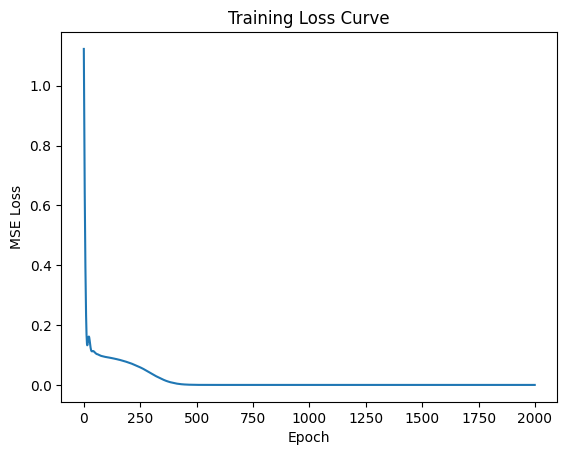

Predicted House Price: $278513.34


In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# --------------------------
# Dataset
# --------------------------
# Features: [Size (sqft), Number of Bedrooms]
# Target: Price (in $1000)
X = torch.tensor([[1400, 3],
                  [1600, 3],
                  [1700, 3],
                  [1875, 4],
                  [1100, 2]], dtype=torch.float32)
y = torch.tensor([[245],
                  [312],
                  [279],
                  [308],
                  [199]], dtype=torch.float32)

# --------------------------
# Standardize features
# --------------------------
X_mean = X.mean(dim=0)
X_std = X.std(dim=0)
X_norm = (X - X_mean) / X_std

y_mean = y.mean()
y_std = y.std()
y_norm = (y - y_mean) / y_std   # optional: normalize target for stability

# --------------------------
# Model
# --------------------------
class HousePriceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 16)  # hidden layer
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

model = HousePriceModel()

# --------------------------
# Loss & Optimizer
# --------------------------
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# --------------------------
# Training Loop
# --------------------------
epochs = 2000
loss_list = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_norm)
    loss = criterion(outputs, y_norm)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())

    if (epoch+1) % 200 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# --------------------------
# Plot Loss Curve
# --------------------------
plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.show()

# --------------------------
# Prediction
# --------------------------
test_sample = torch.tensor([[1500, 3]], dtype=torch.float32)
# Normalize test sample
test_sample_norm = (test_sample - X_mean) / X_std

pred_norm = model(test_sample_norm).item()
# Convert back to original scale
pred_price = pred_norm * y_std + y_mean
print(f"Predicted House Price: ${pred_price*1000:.2f}")
